<a href="https://colab.research.google.com/github/dotsoon/workspace/blob/master/1_11%EC%9B%94_%EC%A0%9C%EC%A3%BC%EC%8B%9C%2C_%EC%84%9C%EA%B7%80%ED%8F%AC%EC%8B%9C_%EC%9D%8C%EC%8B%9D%EC%A0%90_%EC%9D%8D%2C%EB%A9%B4%2C%EB%8F%99(%ED%8C%8C%EC%9D%B4%EA%B7%B8%EB%9E%98%ED%94%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

In [ ]:
rawData = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/pj/JT_SHP_SALES_VARTION_LIST_202111.csv')
jejusi = rawData[rawData['SIGNGU_NM'].isin(['제주시'])]
seogwiposi = rawData[rawData['SIGNGU_NM'].isin(['서귀포시'])]
jeup_df = rawData[ (rawData['SIGNGU_NM'] == '제주시')& (rawData['AREA_NM'].str.contains('읍'))]
jmyeon_df = rawData[ (rawData['SIGNGU_NM'] == '제주시')& (rawData['AREA_NM'].str.contains('면'))]
jdong_df = rawData[ (rawData['SIGNGU_NM'] == '제주시')& (rawData['AREA_NM'].str.contains('동'))]
jeju_eup_df = jeup_df.reset_index(drop=True)
jeju_myeon_df = jmyeon_df.reset_index(drop=True)
jeju_dong_df = jdong_df.reset_index(drop=True)
seup_df = rawData[ (rawData['SIGNGU_NM'] == '서귀포시')& (rawData['AREA_NM'].str.contains('읍'))]
smyeon_df = rawData[ (rawData['SIGNGU_NM'] == '서귀포시')& (rawData['AREA_NM'].str.contains('면'))]
sdong_df = rawData[ (rawData['SIGNGU_NM'] == '서귀포시')& (rawData['AREA_NM'].str.contains('동'))]
seogwipo_eup_df = seup_df.reset_index(drop=True)
seogwipo_myeon_df = smyeon_df.reset_index(drop=True)
seogwipo_dong_df = sdong_df.reset_index(drop=True)

In [ ]:
rawData.columns

Index(['ANALS_YM', 'CMPNM_NM', 'SIGNGU_NM', 'ADSTRD_NM', 'AREA_NM', 'MLSFC_NM',
       'SCLAS_NM', 'JJINHBT_SALES_PRICE_RATE', 'JJINHBT_SALES_CO_RATE',
       'OTSD_SALES_PRICE_RATE', 'OTSD_SALES_CO_RATE', 'ALL_SALES_PRICE_RATE',
       'ALL_SALES_CO_RATE', 'VARTION_RT', 'RANK_CO', 'GID_ID'],
      dtype='object')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
sigubun = rawData.loc[:,'SIGNGU_NM']

## 제주시 서귀포시 분포

제주시가 서귀포보다 두배많다~ 공항과 유명 해변들의 영향?

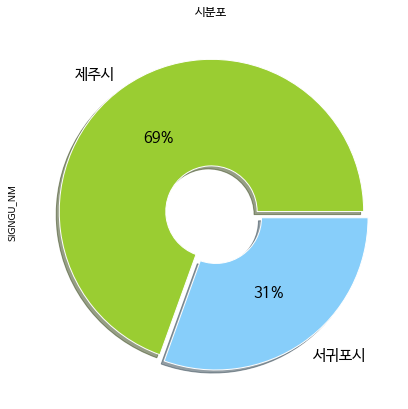

In [ ]:
siname=['제주시', '서귀포시']
sigubun.value_counts().plot(kind='pie', autopct='%2.f%%', figsize=(10,7),fontsize=15, title='시분포', 
                            labels=siname, colors=['yellowgreen','lightskyblue'], explode=(0,0.05), shadow=True, 
                            wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1})

In [ ]:
eup = jeup_df.loc[:,['ADSTRD_NM']]

### 제주시 읍 구분
제주시는 읍별로 비슷비슷한 분포

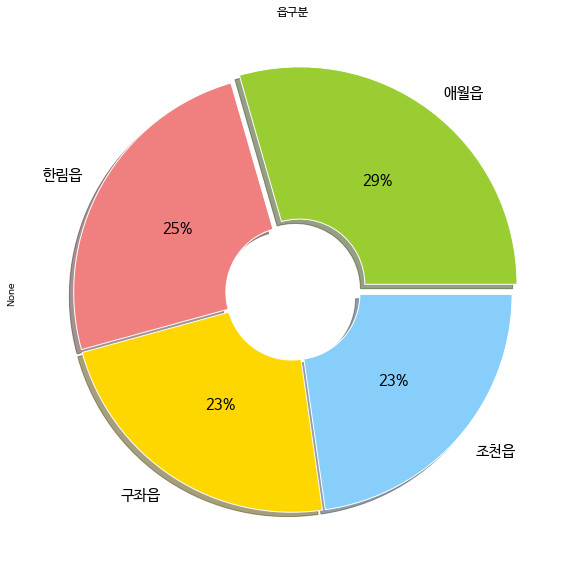

In [ ]:
eupname=['애월읍','한림읍','구좌읍','조천읍']
eup.value_counts().plot(kind='pie', autopct='%2.f%%', figsize=(15,10),fontsize=15, title='읍구분', labels=eupname,
                        colors=['yellowgreen','lightcoral','gold','lightskyblue'], explode=[0.05,0.01,0.01,0.01], shadow=True,
                        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1})

In [ ]:
myeon = jmyeon_df.loc[:,['ADSTRD_NM']]

### 제주시 면구분
면으로 보면 한경면이 우도면보다 두배이상 많다 우도는 섬이니까 그렇겠지~

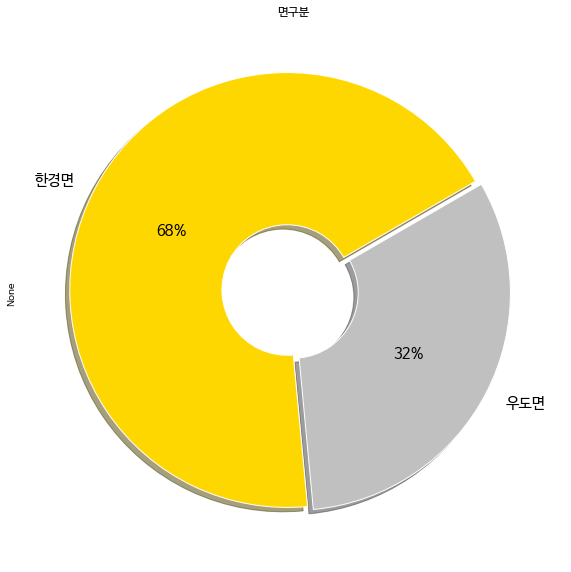

In [ ]:
myeonname=['한경면','우도면']
myeon.value_counts().plot(kind='pie', autopct='%2.f%%', figsize=(15,10),fontsize=15, title='면구분', shadow=True,
                          labels=myeonname, colors=['gold','silver'], explode=[0.03,0], startangle=30,
                          wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1})

In [ ]:
dong = jdong_df.loc[:,['ADSTRD_NM']]

### 제주시 동구분

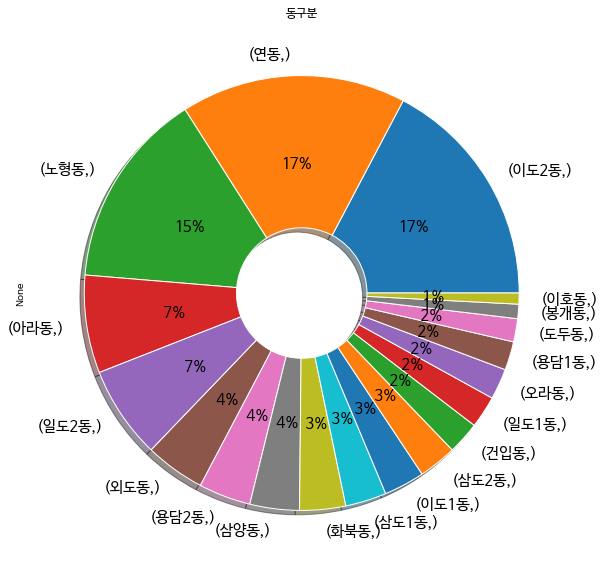

In [ ]:
dong.value_counts().plot(kind='pie', autopct='%2.f%%', figsize=(15,10),fontsize=15, title='동구분', shadow=True, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1})

In [ ]:
seup = seup_df.loc[:,['ADSTRD_NM']]

### 서귀포시 읍구분
서귀포시 읍은 성산읍이 제일 많음 

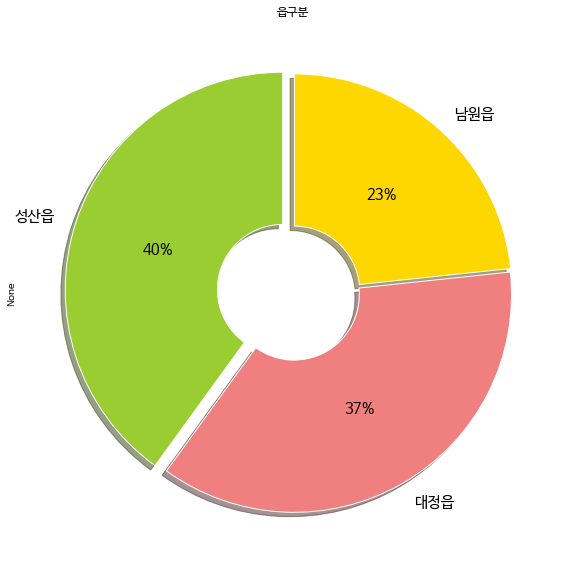

In [ ]:
seupname=['성산읍','대정읍','남원읍']
seup.value_counts().plot(kind='pie', autopct='%2.f%%', figsize=(15,10),fontsize=15, title='읍구분', labels=seupname,
                        colors=['yellowgreen','lightcoral','gold'], explode=[0.05,0.01,0.01], shadow=True, startangle=90,
                         wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1})

In [ ]:
smyeon = smyeon_df.loc[:,['ADSTRD_NM']]

### 서귀포시 면구분
면은 비슷비슷한 분포 

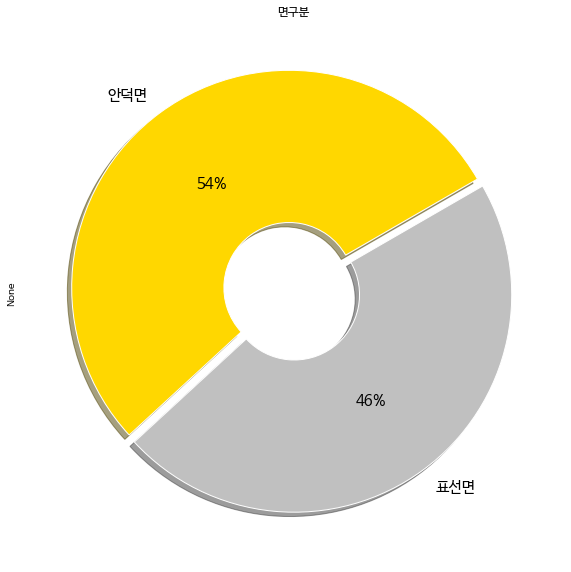

In [ ]:
seupname=['안덕면','표선면']
smyeon.value_counts().plot(kind='pie', autopct='%2.f%%', figsize=(15,10),fontsize=15, title='면구분',labels=seupname,
                        colors=['gold','silver'], explode=[0.03,0.01], shadow=True, startangle=30,wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1})

In [ ]:
sdong = sdong_df.loc[:,['ADSTRD_NM']]

### 서귀포시 동구분

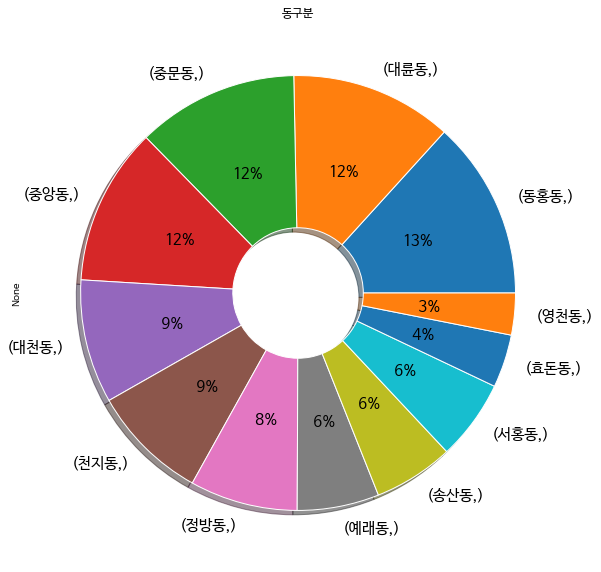

In [ ]:
sdong.value_counts().plot(kind='pie', autopct='%2.f%%', figsize=(15,10),fontsize=15, title='동구분', shadow=True,wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1})